## Mobile Payments in Kenya

This notebook analyses a dataset called Mobile Payments located at the following url (under the Statistics tab) as of March 2025: https://www.centralbank.go.ke/

Time series analysis is shown below in charts and tables. While the data starts as of March 2007, a subset of the data was extracted covering the time period 2020 - 2024.

Please note my code includes quite a few lines that double check output to ensure correct operation was executed and the output is as expected.

    


In [26]:
!pip3 install seaborn -q
!pip3 install matplotlib -q
!pip3 install statsmodels -q

In [27]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

In [28]:
df = pd.read_csv('Mobile Payments.csv')

In [29]:
print(f'df shape: {df.shape} \n')
print(f'data types: \n {df.dtypes} \n')
df

df shape: (214, 8) 

data types: 
 Year                                                   int64
Month                                                 object
Active Agents                                          int64
Total Registered Mobile Money Accounts (Millions)    float64
Total Agent Cash in Cash Out (Volume Million)        float64
Total Agent Cash in Cash Out (Value KSh billions)    float64
Unnamed: 6                                           float64
Unnamed: 7                                           float64
dtype: object 



,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),Unnamed: 6,Unnamed: 7
0,2024,December,381116,82.430000,309.280000,753.450000,NaN,NaN
1,2024,November,383624,81.550000,297.020000,707.270000,NaN,NaN
2,2024,October,358621,80.820000,215.260000,722.280000,NaN,NaN
3,2024,September,367551,79.370000,196.490000,670.520000,NaN,NaN
4,2024,August,348065,78.640000,214.250000,705.910000,NaN,NaN
...,...,...,...,...,...,...,...,...
209,2007,July,681,0.268499,0.354298,1.065370,NaN,NaN
210,2007,June,527,0.175652,0.233661,0.720102,NaN,NaN
211,2007,May,447,0.107733,0.150000,0.483709,NaN,NaN
212,2007,April,362,0.054944,0.070000,0.220896,NaN,NaN


In [30]:
df.Year.value_counts()

Year
2024    12
2023    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022    12
2007    10
Name: count, dtype: int64

In [31]:
# Take subset of data from 2020 - 2024

df_sub = df[df['Year'].isin([2020, 2021, 2022, 2023, 2024])].copy() 
print(f'df_sub shape: {df_sub.shape}')

df_sub shape: (60, 8)


In [32]:
df_sub['month_year'] = df_sub['Month'].astype(str) + ' ' + df_sub['Year'].astype(str)
df_sub['month_year'] = pd.to_datetime(df_sub['month_year'], format='%B %Y')
df_sub['month_year']


0    2024-12-01
1    2024-11-01
2    2024-10-01
3    2024-09-01
4    2024-08-01
5    2024-07-01
6    2024-06-01
7    2024-05-01
8    2024-04-01
9    2024-03-01
10   2024-02-01
11   2024-01-01
12   2023-12-01
13   2023-11-01
14   2023-10-01
15   2023-09-01
16   2023-08-01
17   2023-07-01
18   2023-06-01
19   2023-05-01
20   2023-04-01
21   2023-03-01
22   2023-02-01
23   2023-01-01
24   2022-12-01
25   2022-11-01
26   2022-10-01
27   2022-09-01
28   2022-08-01
29   2022-07-01
30   2022-06-01
31   2022-05-01
32   2022-04-01
33   2022-03-01
34   2022-02-01
35   2022-01-01
36   2021-12-01
37   2021-11-01
38   2021-10-01
39   2021-09-01
40   2021-08-01
41   2021-07-01
42   2021-06-01
43   2021-05-01
44   2021-04-01
45   2021-03-01
46   2021-02-01
47   2021-01-01
48   2020-12-01
49   2020-11-01
50   2020-10-01
51   2020-09-01
52   2020-08-01
53   2020-07-01
54   2020-06-01
55   2020-05-01
56   2020-04-01
57   2020-03-01
58   2020-02-01
59   2020-01-01
Name: month_year, dtype: datetime64[ns]

In [33]:
df_sub.dtypes

Year                                                          int64
Month                                                        object
Active Agents                                                 int64
Total Registered Mobile Money Accounts (Millions)           float64
Total Agent Cash in Cash Out (Volume Million)               float64
Total Agent Cash in Cash Out (Value KSh billions)           float64
Unnamed: 6                                                  float64
Unnamed: 7                                                  float64
month_year                                           datetime64[ns]
dtype: object

In [34]:
# Convert 'Total Agent Cash in Cash Out (Volume Million)' to int for easier readability and charting
df_sub['Cash In Out (in Millions Dollars)'] = df_sub['Total Agent Cash in Cash Out (Volume Million)'] * 1000000
print(df_sub['Cash In Out (in Millions Dollars)'].dtypes)
df_sub['Cash In Out (in Millions Dollars)'] = df_sub['Cash In Out (in Millions Dollars)'].astype('int')
print(df_sub['Cash In Out (in Millions Dollars)'].dtypes)
print(df_sub['Cash In Out (in Millions Dollars)'].head())

float64
int64
0    309280000
1    297020000
2    215260000
3    196490000
4    214250000
Name: Cash In Out (in Millions Dollars), dtype: int64


In [35]:
# Create column for average cash in/out by agent in dollars to assess trends
df_sub['Avg Cash In Cash Out by Agent (Dollars)'] = round(df_sub['Cash In Out (in Millions Dollars)'] / df_sub['Active Agents'])
df_sub['Avg Cash In Cash Out by Agent (Dollars)'] = df_sub['Avg Cash In Cash Out by Agent (Dollars)'].round().astype(int)
print(df_sub['Avg Cash In Cash Out by Agent (Dollars)'].head())

0    812
1    774
2    600
3    535
4    616
Name: Avg Cash In Cash Out by Agent (Dollars), dtype: int64


In [36]:
# Make total registered mobile accounts an int, not float
df_sub['Total Registered Mobile Money Accnts (Millions)'] = df_sub['Total Registered Mobile Money Accounts (Millions)'] * 1000000
print(df_sub['Total Registered Mobile Money Accnts (Millions)'].dtypes)
df_sub['Total Registered Mobile Money Accnts (Millions)'] = df_sub['Total Registered Mobile Money Accnts (Millions)'].astype('int')
print(df_sub['Total Registered Mobile Money Accnts (Millions)'].dtypes)
print(df_sub['Total Registered Mobile Money Accnts (Millions)'].head())


float64
int64
0    82430000
1    81550000
2    80820000
3    79370000
4    78640000
Name: Total Registered Mobile Money Accnts (Millions), dtype: int64


In [37]:
df_sub.dtypes

Year                                                          int64
Month                                                        object
Active Agents                                                 int64
Total Registered Mobile Money Accounts (Millions)           float64
Total Agent Cash in Cash Out (Volume Million)               float64
Total Agent Cash in Cash Out (Value KSh billions)           float64
Unnamed: 6                                                  float64
Unnamed: 7                                                  float64
month_year                                           datetime64[ns]
Cash In Out (in Millions Dollars)                             int64
Avg Cash In Cash Out by Agent (Dollars)                       int64
Total Registered Mobile Money Accnts (Millions)               int64
dtype: object

In [38]:
# Create new dataframe; remove unnecessary columns and make month_year the index
df_analysis = df_sub[['month_year', 'Active Agents', 'Avg Cash In Cash Out by Agent (Dollars)', 'Total Registered Mobile Money Accnts (Millions)', 'Cash In Out (in Millions Dollars)']]
df_analysis = df_analysis.set_index('month_year')
print(df_analysis.head())

            Active Agents  Avg Cash In Cash Out by Agent (Dollars)  \
month_year                                                           
2024-12-01         381116                                      812   
2024-11-01         383624                                      774   
2024-10-01         358621                                      600   
2024-09-01         367551                                      535   
2024-08-01         348065                                      616   

            Total Registered Mobile Money Accnts (Millions)  \
month_year                                                    
2024-12-01                                         82430000   
2024-11-01                                         81550000   
2024-10-01                                         80820000   
2024-09-01                                         79370000   
2024-08-01                                         78640000   

            Cash In Out (in Millions Dollars)  
month_year         

#### Begin Charts Section
Start with simple charts that plot actual number. Afterward, implement stationarity analyses.

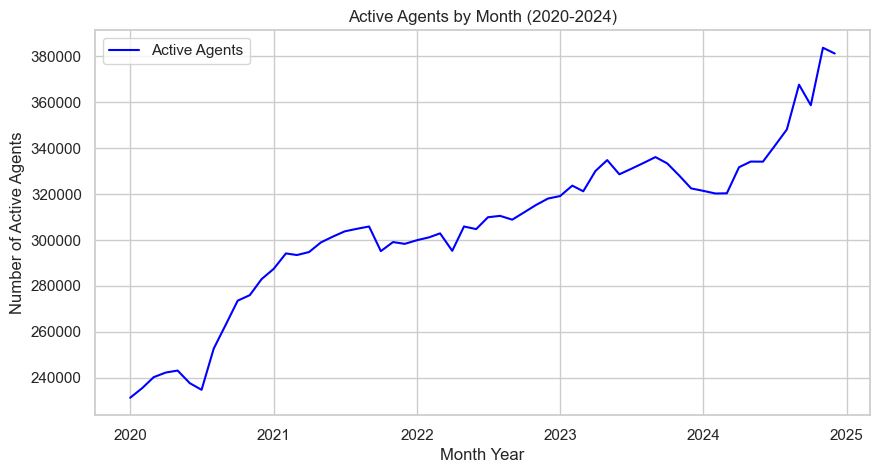

In [39]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(10, 5))  # Setting the figure size
sns.lineplot(data=df_analysis, x='month_year', y='Active Agents', label='Active Agents', color='blue')

# Adding labels and title
plt.xlabel('Month Year')
plt.ylabel('Number of Active Agents')
plt.title('Active Agents by Month (2020-2024)')

plt.show()


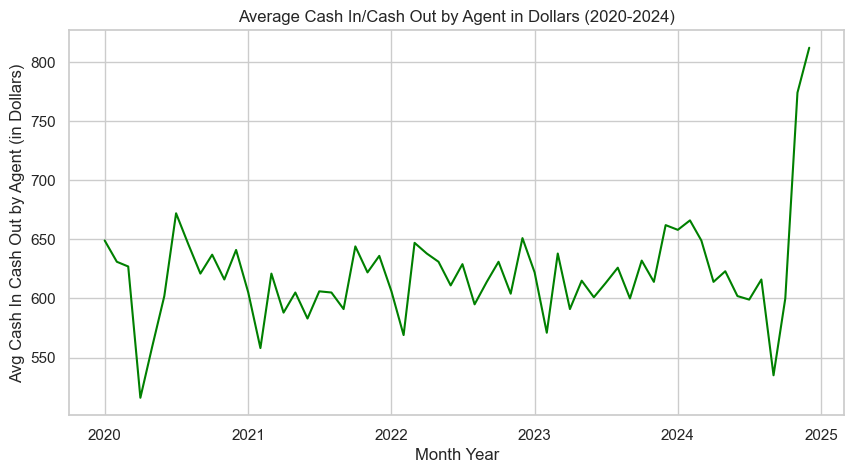

In [40]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(10, 5))  # Setting the figure size
sns.lineplot(data=df_analysis, x='month_year', y='Avg Cash In Cash Out by Agent (Dollars)', label='', color='green')

# Adding labels and title
plt.xlabel('Month Year')
plt.ylabel('Avg Cash In Cash Out by Agent (in Dollars)')
plt.title('Average Cash In/Cash Out by Agent in Dollars (2020-2024)')

plt.show()


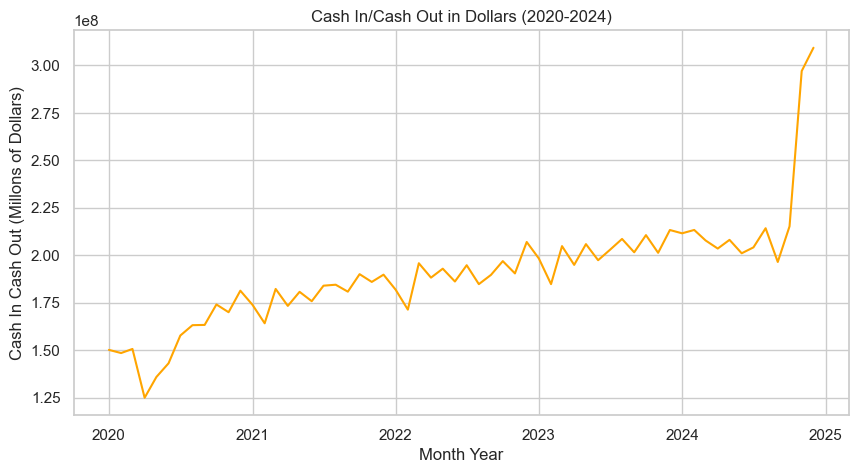

In [41]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(10, 5))  # Setting the figure size
sns.lineplot(data=df_analysis, x='month_year', y='Cash In Out (in Millions Dollars)', label='', color='orange')

# Adding labels and title
plt.xlabel('Month Year')
plt.ylabel('Cash In Cash Out (Millons of Dollars)')
plt.title('Cash In/Cash Out in Dollars (2020-2024)')

plt.show()


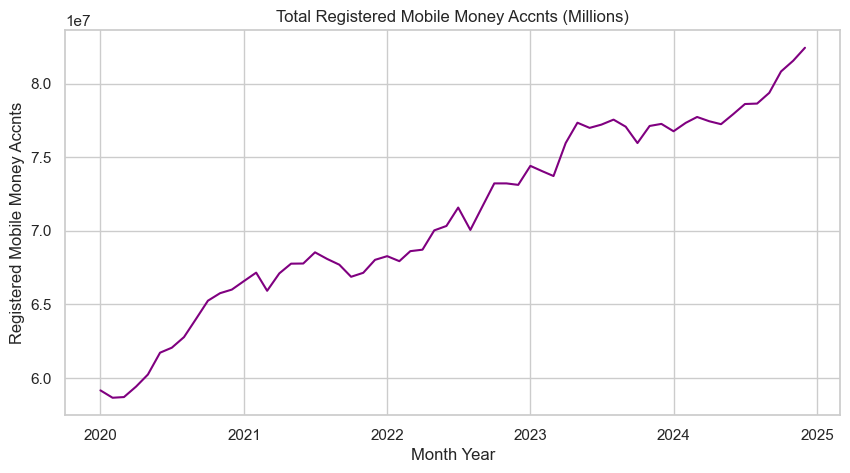

In [42]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(10, 5))  # Setting the figure size
sns.lineplot(data=df_analysis, x='month_year', y='Total Registered Mobile Money Accnts (Millions)', label='', color='purple')

# Adding labels and title
plt.xlabel('Month Year')
plt.ylabel('Registered Mobile Money Accnts')
plt.title('Total Registered Mobile Money Accnts (Millions)')

plt.show()


### Plot month-over-month percent change for the above charts.

In [43]:
# Create columns that calculate Month of Month (MoM) percent change
df_analysis['Active Agents MoM % Change'] = round((df_analysis['Active Agents'].pct_change( periods=-1) * 100), 2)
df_analysis['Avg Cash In/Out by Agent MoM % Change'] = round((df_analysis['Avg Cash In Cash Out by Agent (Dollars)'].pct_change( periods=-1) * 100), 2)
df_analysis['Cash In/Out MoM % Change'] = round((df_analysis['Cash In Out (in Millions Dollars)'].pct_change( periods=-1) * 100), 2)
df_analysis['Total Registered Mobile Money Accnts MoM % Change'] = round((df_analysis['Total Registered Mobile Money Accnts (Millions)'].pct_change( periods=-1) * 100), 2)

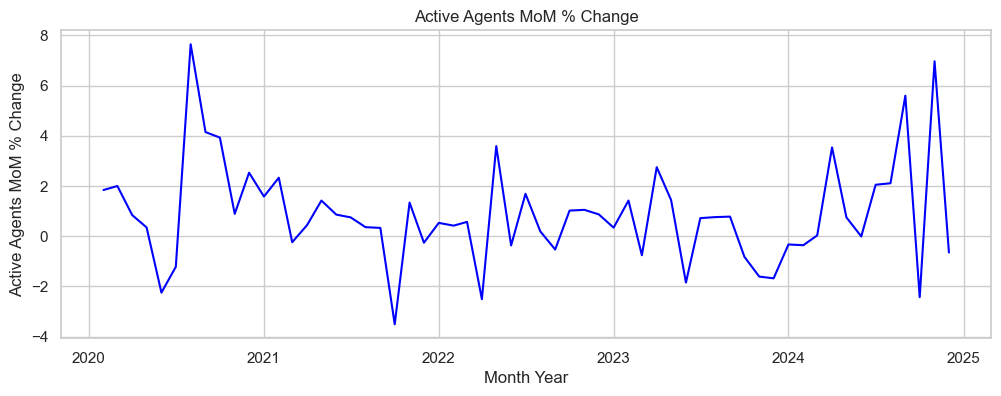

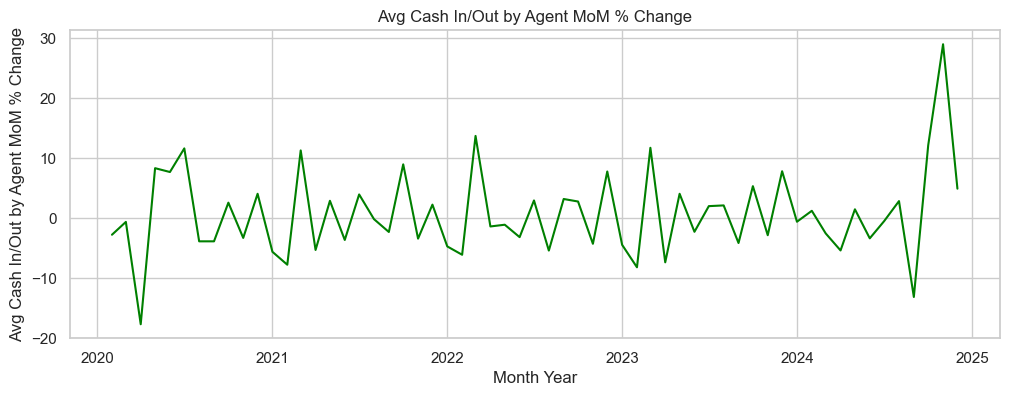

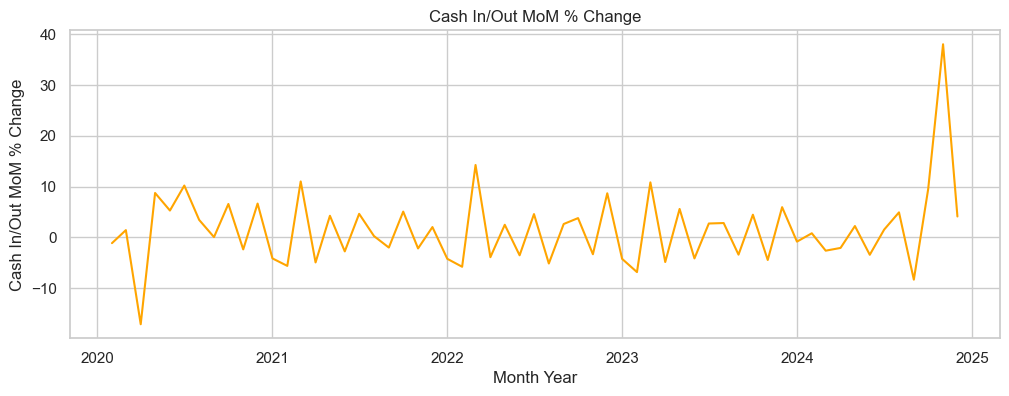

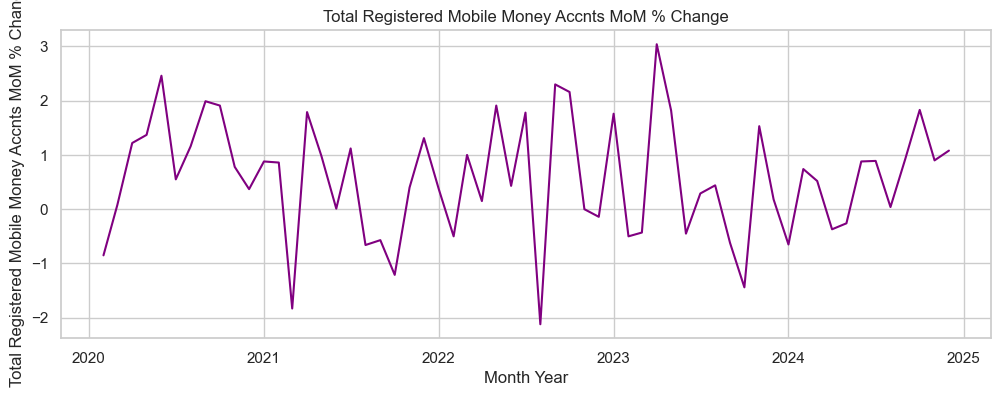

In [44]:
# Print out a chart for each of the Month over Month columns

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

cols_color_dict = {'Active Agents MoM % Change': 'blue', 
                   'Avg Cash In/Out by Agent MoM % Change': 'green',
                   'Cash In/Out MoM % Change': 'orange',
                   'Total Registered Mobile Money Accnts MoM % Change': 'purple'}

for key in cols_color_dict:
    value = cols_color_dict[key]
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df_analysis, x='month_year', y=key, label='', color=value)

    # Adding labels and title
    plt.xlabel('Month Year')
    plt.ylabel(key)
    plt.title(key)

    plt.show()

### Test for Stationarity

Two tests will be used and a couple of the metrics will be evaluated.

Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time. Many statistical models require the series to be stationary to make effective and precise predictions.

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root.

Alternate Hypothesis: The series has no unit root.

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).



In [45]:
# ADF Test
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [46]:
# Function to print ADF results for multiple columns
_columns = ['Active Agents', 'Cash In Out (in Millions Dollars)', 'Total Registered Mobile Money Accnts (Millions)']

for c in _columns:
    print(f"ADF test for {c}: \n")
    print(adf_test(df_analysis[c]))
    print('\n')


ADF test for Active Agents: 

Results of Dickey-Fuller Test:
Test Statistic                 -0.738121
p-value                         0.836627
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64
None


ADF test for Cash In Out (in Millions Dollars): 

Results of Dickey-Fuller Test:
Test Statistic                  0.842537
p-value                         0.992293
#Lags Used                      6.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64
None


ADF test for Total Registered Mobile Money Accnts (Millions): 

Results of Dickey-Fuller Test:
Test Statistic                 -0.335792
p-value                         0.920280
#Lags Used                      0.000000
Number of Observations

In [47]:
# KPSS Test

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


In [48]:
# Function to print KPSS results for multiple columns
_columns = ['Active Agents', 'Cash In Out (in Millions Dollars)', 'Total Registered Mobile Money Accnts (Millions)']

for c in _columns:
    print(f"KPSS test for {c}: \n")
    print(kpss_test(df_analysis[c]))
    print('\n')


KPSS test for Active Agents: 

Results of KPSS Test:
Test Statistic           1.166647
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


KPSS test for Cash In Out (in Millions Dollars): 

Results of KPSS Test:
Test Statistic           1.154257
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


KPSS test for Total Registered Mobile Money Accnts (Millions): 

Results of KPSS Test:
Test Statistic           1.279544
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None




/var/folders/1v/57wkhswn1l3c8n0by0vqt4_40000gn/T/ipykernel_37121/2473651471.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
/var/folders/1v/57wkhswn1l3c8n0by0vqt4_40000gn/T/ipykernel_37121/2473651471.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
/var/folders/1v/57wkhswn1l3c8n0by0vqt4_40000gn/T/ipykernel_37121/2473651471.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


### Conclusion
Both tests indicate the data has stationarity. There are no trends or seasonality to the data. 